In [3]:
import time
import re
import sqlite3
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By #https://www.seleniumhq.org/docs/03_webdriver.jsp#locating-ui-elements-webelements
import requests
import lxml.html
import re
import time
import numpy as np
import pandas as pd
# 예외 처리를 위한 모듈
from selenium.webdriver.support import expected_conditions as EC


# 드라이버 켠다
driver = webdriver.Chrome("C:/driver/chromedriver.exe")
url='https://store.naver.com/restaurants/list?filterId=s13479410&menu=%EB%B9%B5%EC%A7%91&query=%EC%84%9C%EC%B4%88%EC%97%AD%20%EB%A7%9B%EC%A7%91'
driver.get(url)


# 검색 로직
'''driver.find_element_by_id('query').send_keys("서초역 빵집")
time.sleep(1)
driver.find_element_by_id('search_btn').click() #검색 버튼 클릭
time.sleep(1)'''


def scrape_list_page(response):
    #print(response)
    root = lxml.html.fromstring(response.text)
    root.make_links_absolute(response.url)
    boxItems = soup.select(".list_place_col1 .list_item_inner")
    for boxItem in boxItems:
        url = boxItem.select('div.info_area > div.tit > span')[0].find('a')['href'] #'div.info_area > div.tit > span > a'
        yield url

def scrape_detail_page(response, count):
    root = lxml.html.fromstring(response.text)
    root.make_links_absolute(response.url)
    length = root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_menu > div > ul > li")
    menus = {}
    for i in range(len(length)-1):
        print(length[i].text_content())
        allMenu = (length[i].text_content()).split('원')
        menus[allMenu[1]] = allMenu[0]

    if count!=9 and count!=19:
        bakeryInfo= {
            'URL' : response.url,
            'Title': root.cssselect("#content > div:nth-child(1) > div.biz_name_area > strong")[0].text_content(),
            'Review':root.cssselect("#content > div:nth-child(1) > div.biz_name_area > div > div > a")[0].text_content(),
            'Menus':menus,
            'Address':root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_address > div > ul > li:nth-child(1) > span")[0].text_content(),
            'Tell':root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_biztel > div")[0].text_content(),
            'Opentime':re.search('([0-9]+[:][0-9]+)\s[-]\s([0-9]+[:][0-9]+)', root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_biztime > div > div > div > div > span > span")[0].text_content()).group(1),
            'Closetime':re.search('([0-9]+[:][0-9]+)\s[-]\s([0-9]+[:][0-9]+)', root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_biztime > div > div > div > div > span > span")[0].text_content()).group(2),
        }
        return bakeryInfo
    elif count==9 and count!=19:
        bakeryInfo= {
            'URL' : response.url,
            'Title': root.cssselect("#content > div:nth-child(1) > div.biz_name_area > strong")[0].text_content(),
            'Review':root.cssselect("#content > div:nth-child(1) > div.biz_name_area > div > div > a")[0].text_content(),
            'Menus':menus,
            'Address':root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_address > div > ul > li:nth-child(1) > span")[0].text_content(),
            'Tell':root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_biztel > div")[0].text_content(),
            'Opentime':re.search('([0-9]+[:][0-9]+)\s[-]\s([0-9]+[:][0-9]+)', root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_biztime > div > a > div:nth-child(1) > div:nth-child(2) > span > span")[0].text_content()).group(1),
            
            'Closetime':re.search('([0-9]+[:][0-9]+)\s[-]\s([0-9]+[:][0-9]+)', root.cssselect("#content > div:nth-child(2) > div.bizinfo_area > div > div.list_item.list_item_biztime > div > a > div:nth-child(1) > div:nth-child(2) > span > span")[0].text_content()).group(2)
        }
        return bakeryInfo
    else:
        bakeryInfo= {
            'URL' : response.url,
            'Title': root.cssselect("#content > div:nth-child(1) > div.biz_name_area > strong")[0].text_content(),
            'Review':root.cssselect("#content > div:nth-child(1) > div.biz_name_area > div > div > a")[0].text_content(),
            'Menus':menus,
            'Address':root.cssselect("#content > div:nth-child(2) > div > div > div.list_item.list_item_address > div > ul > li:nth-child(1) > span")[0].text_content(),
            'Tell':root.cssselect("#content > div:nth-child(2) > div > div > div.list_item.list_item_biztel > div")[0].text_content(),
            'Opentime':re.search('([0-9]+[:][0-9]+)\s[-]\s([0-9]+[:][0-9]+)', root.cssselect("#content > div:nth-child(2) > div > div > div.list_item.list_item_biztime > div > a > div:nth-child(1) > div:nth-child(1) > span.time.highlight > span")[0].text_content()).group(1),
            'Closetime':re.search('([0-9]+[:][0-9]+)\s[-]\s([0-9]+[:][0-9]+)', root.cssselect("#content > div:nth-child(2) > div > div > div.list_item.list_item_biztime > div > a > div:nth-child(1) > div:nth-child(1) > span.time.highlight > span")[0].text_content()).group(2)
        }
        return bakeryInfo

def blog_url_scrape(response):
    root = lxml.html.fromstring(response.text)
    root.make_links_absolute(response.url)
    url = root.cssselect('#content > div:nth-child(1) > div.biz_name_area > div > div > a')[0].get('href')
    response = session.get(url)
   
    root = lxml.html.fromstring(response.text)
    root.make_links_absolute(response.url)

    for a in root.cssselect('#panel03 > div > ul > li > div > div > div.tit > a'):
        blogURL = a.get('href')
        yield blogURL



def blog_scrape_review(blog, blog_response):
    contentInfo = []
    driver.get(blog)
    driver.switch_to.frame('mainFrame')
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    blogID = re.sub(r'.*?//.*?/.*?/', '', blog)
    blogTag = '#post-view' + blogID
    content_list = soup.select(blogTag)[0].select('p')
    contents = [i.text for i in content_list]
    for word in contents:
        word = word.strip()
        word = re.sub('[^ ㄱ-ㅣ가-힣]+','', word)
        contentInfo.append(word)

    reviewInfo = {
        'blog_url':blog,
        'content':' '.join(contentInfo)
    }
    return reviewInfo



try:
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    session = requests.Session()
    response = session.get(url)
    #print(response)
    urls = scrape_list_page(response)
    count = 1
    bakeryAll=[]
    for url in urls:
        print(count,'번째  =====================================================')
        time.sleep(1)
        #print(url)
        response = session.get(url)
        bakeryInfo = scrape_detail_page(response, count)
        blogs = blog_url_scrape(response)
        reviewAll = []
        
        for blog in blogs:
            time.sleep(1)
            if('blog' in blog):
                blog_response = session.get(blog)
                reviewInfo = blog_scrape_review(blog, blog_response)
                reviewAll.append(reviewInfo)
            else:
                pass

        bakeryInfo['ReviewList'] = reviewAll
        bakeryAll.append(bakeryInfo)
        count +=1
    
    print(bakeryAll)
except Exception as e:
    print("페이지 파싱 에러", e)
finally:
    time.sleep(3)
    driver.close()

1 번째  =====================================================
12,000원대표홍차밀크잼
18,000원대표홍차블루베리파운드
5,000원생크림브리오슈
4,000원자몽카스타드
5,500원레몬치즈타르트
2 번째  =====================================================
3,500원아메리카노
4,000원카페라떼
4,500원카라멜마끼야또
4,500원바닐라라떼
4,500원카페모카
3 번째  =====================================================
1,800원돌돌말린 소시지 도넛
2,100원치즈소시지 페스츄리
2,200원추억의 소시지빵
4 번째  =====================================================
8,500원망고치즈케익 스노우러빙
12,000원레드벨벳 롤
23,000원클래식치즈케익3호
5 번째  =====================================================
2,000원마드레느
2,000원쿠레호두만쥬
2,000원쿠레밤만쥬
2,800원토토로빵
2,800원호빵맨빵
6 번째  =====================================================
8,500원망고치즈케익 스노우러빙
12,000원레드벨벳 롤
23,000원클래식치즈케익3호
7 번째  =====================================================
8 번째  =====================================================
3,500원오리지날 크루아상
4,000원아몬드 크루아상
4,500원초코 크루아상
3,600원말차 큐브데니쉬
3,700원시금치바질 치아바타
9 번째  =====================================================
8,500원몽블랑 엠오
8,000원블랑망제이베르
8,000원치즈케이크후레

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame(bakeryAll)

In [9]:
df

,Address,Closetime,Menus,Opentime,Review,ReviewList,Tell,Title,URL
0,서울 서초구 서초대로41길 19,22:00,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",08:00,블로그 리뷰 187,[{'blog_url': 'https://blog.naver.com/leegy040...,02-6188-8845,메종드꼼빠뇽,https://store.naver.com/restaurants/detail?id=...
1,서울 서초구 반포대로23길 6,22:00,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",08:00,블로그 리뷰 18,[{'blog_url': 'https://blog.naver.com/sunf812/...,070-8285-8897,플레인,https://store.naver.com/restaurants/detail?id=...
2,서울 서초구 서초대로40길 50,24:00,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...,02-3486-0809,파리바게뜨 서초역점,https://store.naver.com/restaurants/detail?id=...
3,서울 서초구 서초대로40길 41,23:00,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/breadsch...,02-588-1222,뚜레쥬르 서초역점,https://store.naver.com/restaurants/detail?id=...
4,서울 서초구 법원로3길 26,21:00,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",09:00,블로그 리뷰 4,[{'blog_url': 'https://blog.naver.com/art69804...,070-4488-0888,그랑제리,https://store.naver.com/restaurants/detail?id=...
5,서울 서초구 서초대로 264,23:00,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/woojoo90...,02-523-9760,뚜레쥬르 서초법조타워점,https://store.naver.com/restaurants/detail?id=...
6,서울 서초구 서초대로 224,23:00,{},07:00,블로그 리뷰 3,[],02-537-3290,베이크스토리 서초점,https://store.naver.com/restaurants/detail?id=...
7,서울 서초구 서초중앙로 18,21:00,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",08:00,블로그 리뷰 495,[{'blog_url': 'https://blog.naver.com/purulove...,02-322-0939,루엘드파리,https://store.naver.com/restaurants/detail?id=...
8,서울 서초구 방배로26길 22,21:00,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",11:30,블로그 리뷰 528,[{'blog_url': 'https://blog.naver.com/pinkmint...,070-4239-3335,메종엠오,https://store.naver.com/restaurants/detail?id=...
9,서울 서초구 로10길 9 서래,21:00,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",10:00,블로그 리뷰 272,[{'blog_url': 'https://blog.naver.com/myoujin8...,02-595-5705,오뗄두스,https://store.naver.com/restaurants/detail?id=...


In [32]:
df1 = df.copy()
df1

,Address,Closetime,Menus,Opentime,Review,ReviewList,Tell,Title,URL
0,서울 서초구 서초대로41길 19,22:00,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",08:00,블로그 리뷰 187,[{'blog_url': 'https://blog.naver.com/leegy040...,02-6188-8845,메종드꼼빠뇽,https://store.naver.com/restaurants/detail?id=...
1,서울 서초구 반포대로23길 6,22:00,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",08:00,블로그 리뷰 18,[{'blog_url': 'https://blog.naver.com/sunf812/...,070-8285-8897,플레인,https://store.naver.com/restaurants/detail?id=...
2,서울 서초구 서초대로40길 50,24:00,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...,02-3486-0809,파리바게뜨 서초역점,https://store.naver.com/restaurants/detail?id=...
3,서울 서초구 서초대로40길 41,23:00,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/breadsch...,02-588-1222,뚜레쥬르 서초역점,https://store.naver.com/restaurants/detail?id=...
4,서울 서초구 법원로3길 26,21:00,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",09:00,블로그 리뷰 4,[{'blog_url': 'https://blog.naver.com/art69804...,070-4488-0888,그랑제리,https://store.naver.com/restaurants/detail?id=...
5,서울 서초구 서초대로 264,23:00,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/woojoo90...,02-523-9760,뚜레쥬르 서초법조타워점,https://store.naver.com/restaurants/detail?id=...
6,서울 서초구 서초대로 224,23:00,{},07:00,블로그 리뷰 3,[],02-537-3290,베이크스토리 서초점,https://store.naver.com/restaurants/detail?id=...
7,서울 서초구 서초중앙로 18,21:00,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",08:00,블로그 리뷰 495,[{'blog_url': 'https://blog.naver.com/purulove...,02-322-0939,루엘드파리,https://store.naver.com/restaurants/detail?id=...
8,서울 서초구 방배로26길 22,21:00,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",11:30,블로그 리뷰 528,[{'blog_url': 'https://blog.naver.com/pinkmint...,070-4239-3335,메종엠오,https://store.naver.com/restaurants/detail?id=...
9,서울 서초구 로10길 9 서래,21:00,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",10:00,블로그 리뷰 272,[{'blog_url': 'https://blog.naver.com/myoujin8...,02-595-5705,오뗄두스,https://store.naver.com/restaurants/detail?id=...


In [33]:
df1.drop(columns='Title', inplace=True)

In [34]:
df1

,Address,Closetime,Menus,Opentime,Review,ReviewList,Tell,URL
0,서울 서초구 서초대로41길 19,22:00,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",08:00,블로그 리뷰 187,[{'blog_url': 'https://blog.naver.com/leegy040...,02-6188-8845,https://store.naver.com/restaurants/detail?id=...
1,서울 서초구 반포대로23길 6,22:00,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",08:00,블로그 리뷰 18,[{'blog_url': 'https://blog.naver.com/sunf812/...,070-8285-8897,https://store.naver.com/restaurants/detail?id=...
2,서울 서초구 서초대로40길 50,24:00,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...,02-3486-0809,https://store.naver.com/restaurants/detail?id=...
3,서울 서초구 서초대로40길 41,23:00,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/breadsch...,02-588-1222,https://store.naver.com/restaurants/detail?id=...
4,서울 서초구 법원로3길 26,21:00,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",09:00,블로그 리뷰 4,[{'blog_url': 'https://blog.naver.com/art69804...,070-4488-0888,https://store.naver.com/restaurants/detail?id=...
5,서울 서초구 서초대로 264,23:00,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",07:00,블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/woojoo90...,02-523-9760,https://store.naver.com/restaurants/detail?id=...
6,서울 서초구 서초대로 224,23:00,{},07:00,블로그 리뷰 3,[],02-537-3290,https://store.naver.com/restaurants/detail?id=...
7,서울 서초구 서초중앙로 18,21:00,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",08:00,블로그 리뷰 495,[{'blog_url': 'https://blog.naver.com/purulove...,02-322-0939,https://store.naver.com/restaurants/detail?id=...
8,서울 서초구 방배로26길 22,21:00,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",11:30,블로그 리뷰 528,[{'blog_url': 'https://blog.naver.com/pinkmint...,070-4239-3335,https://store.naver.com/restaurants/detail?id=...
9,서울 서초구 로10길 9 서래,21:00,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",10:00,블로그 리뷰 272,[{'blog_url': 'https://blog.naver.com/myoujin8...,02-595-5705,https://store.naver.com/restaurants/detail?id=...


In [157]:
bakery = pd.DataFrame({'주소':df1['Address'],
                       'URL':df1['URL'],
                       '개장':df1['Opentime'],
                       '폐장':df1['Closetime'],
                       '전화번호':df1['Tell'],
                       '메뉴':df1['Menus'],
                       '리뷰개수':df1['Review'],
                       '리뷰목록':df1['ReviewList']})

In [158]:
bakery

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
0,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",블로그 리뷰 187,[{'blog_url': 'https://blog.naver.com/leegy040...
1,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",블로그 리뷰 18,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/breadsch...
4,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",블로그 리뷰 4,[{'blog_url': 'https://blog.naver.com/art69804...
5,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,{},블로그 리뷰 3,[]
7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",블로그 리뷰 495,[{'blog_url': 'https://blog.naver.com/purulove...
8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",블로그 리뷰 528,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",블로그 리뷰 272,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [159]:
bakery.columns

Index(['주소', 'URL', '개장', '폐장', '전화번호', '메뉴', '리뷰개수', '리뷰목록'], dtype='object')

In [160]:
bakery.index

RangeIndex(start=0, stop=20, step=1)

In [161]:
for i in bakery.columns:
    for j in bakery.index:
        if len(bakery.loc[j][i])== 0 or len(bakery.loc[j][i])==0:
            bakery.loc[j][i]='-'

In [91]:
bakery

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
0,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",블로그 리뷰 187,[{'blog_url': 'https://blog.naver.com/leegy040...
1,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",블로그 리뷰 18,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/breadsch...
4,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",블로그 리뷰 4,[{'blog_url': 'https://blog.naver.com/art69804...
5,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,블로그 리뷰 3,-
7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",블로그 리뷰 495,[{'blog_url': 'https://blog.naver.com/purulove...
8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",블로그 리뷰 528,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",블로그 리뷰 272,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [162]:
import re
import pandas as pd
import numpy as np
data = pd.DataFrame(bakery['리뷰목록'])

In [163]:
data

,리뷰목록
0,[{'blog_url': 'https://blog.naver.com/leegy040...
1,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,[{'blog_url': 'https://blog.naver.com/breadsch...
4,[{'blog_url': 'https://blog.naver.com/art69804...
5,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,-
7,[{'blog_url': 'https://blog.naver.com/purulove...
8,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [164]:
import re
for j in range(20):
    for i in range(len(data.iloc[j,0])):
        if data.iloc[j,0][i]!='-':
            data.iloc[j,0][i]['content'] = re.sub("\s+", " ", data.iloc[j,0][i]['content'])

In [178]:
data.iloc[0,0]

[{'blog_url': 'https://blog.naver.com/leegy0407/221406337006',
  'content': '주말에 다녀온 서초역 카페 메종드꼼빠뇽 비가 와서 야외테이블에 앉지는 못했지만 너무나 운치있는 모습 내부 인테리어도 분위기 있고 좋다 색색깔 예쁜 타르트들 브리오슈도 맛있어 보인다 메종드꼼빠뇽이 좋은 점은 빵 시식이 준비되어 있는 점 이 후르츠브레드 상큼하니 정말 맛있었다 상당한 크기의 식빵들 아무것도 바르지 않고 뜯어 먹어도 너무 맛있을 것 같다 단호박이 듬뿍 올라간 호박카스테라도 하나 담았다 내가 좋아하는 앙버터도 선택 가격 원 토스트 피자 샌드위치 등 식사대용으로 먹을 수 있는 종류도 많았다 맛있어 보였던 쇼콜라오랑쥬 아이스크림도 있다 커피와 음료 종류도 많았는데 따듯한 청귤차로 주문했다 가격 원 계산대에는 귀여운 쿠키들과 마들렌도 놓여 있었다 호두밤롤케이크 원 아몬드 크루아상원 도 골랐다 처음 마셔보는 청귤차 새콤달콤하니 존맛탱 감기에도 좋은 청귤자 꼭 드셔보시길 내가 너무 맛있게 먹으니까 엄마가 너 다 마시라고 커팅해주신 앙버터 아주 빠삭한 바게트에 팥앙금과 버터의 조화 정말 맛있었다 순삭 완료 다음은 아몬드 크루아상 이거 크기도 엄청 컸다 이것도 굿초이스 겹겹이 바삭하니 넘넘 맛있었다 위 두개만 먹었는데도 배불러서 호박카스테라와 밤롤케이크는 포장하기로 했다 쿠키들도 어쩜 하나같이 맛있어 보인다 방부제 합성착향료를 넣지 않은 건강 수제쿠키 쨈도 천연재료로 만든 수제쨈이다 시식도 가능했다 서초역 빵집 메종드꼼빠뇽은 모든 제품에 화학첨가물이나 방부제를 넣지 않은 건강한 빵들이다 맛까지 좋고 건강하기까지 하니 최고 케이크들도 다 너무 예쁘고 맛있어 보인다 생일날 사러 와야지 만족하며 나온 서초역 카페 메종드꼼빠뇽 카페 근처갤러리에 전시도 하고 있어서 구경하고 왔다 다음날 아침에 먹은 이 호두밤롤케이크 크기도 크고 호두도 가득 담기고 취향저격 호박카스테라도 촉촉하니 자꾸 들어가는 맛 빵이 그냥 다 맛있다 정말 서초역 빵집으

In [173]:
newBakery = pd.DataFrame(bakery['리뷰목록']).copy()
newBakery

,리뷰목록
0,[{'blog_url': 'https://blog.naver.com/leegy040...
1,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,[{'blog_url': 'https://blog.naver.com/breadsch...
4,[{'blog_url': 'https://blog.naver.com/art69804...
5,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,-
7,[{'blog_url': 'https://blog.naver.com/purulove...
8,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [174]:
for j in range(20):
    for i in range(len(newBakery.iloc[j,0])):
        if newBakery.iloc[j,0][i]!='-':
            newBakery.iloc[j,0][i]['content'] = newBakery.iloc[j,0][i]['content'].strip()

In [175]:
newBakery

,리뷰목록
0,[{'blog_url': 'https://blog.naver.com/leegy040...
1,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,[{'blog_url': 'https://blog.naver.com/breadsch...
4,[{'blog_url': 'https://blog.naver.com/art69804...
5,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,-
7,[{'blog_url': 'https://blog.naver.com/purulove...
8,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [176]:
import re
for j in range(20):
    for i in range(len(newBakery.iloc[j,0])):
        if newBakery.iloc[j,0][i]!='-':
            newBakery.iloc[j,0][i]['content'] = re.sub('[ㄱ-ㅎㅏ-ㅣ]',' ', newBakery.iloc[j,0][i]['content'])

In [181]:
 newBakery.iloc[0,0][9]['content']

'안녕하세요 이번생은 처음이라 나르샤 입니다 서초역데이트코스로도너무좋겠다강남데이트코스 스케쥴 준비하는분은 맛집리스트로넣어두면 좋을 것 같다찾아오는길은 서초역 번출구 약 직진해서 오른쪽에 바로 보인다서초대법원 맞은편에 있다작년까지만해도 대법원 바로 앞 맞은편에 있어서 매일 점심식사 후또는 업무 중간중간답답함을해소하고자바람쐬러 옥상엘 올라갔었는데보이는 풍경이대법원이였다 오랜만에 이곳을 지나치게되니 조금이상하기도하고이젠 답답하고 갑갑한 회사가 아닌 서초역빵집맛있는걸 먹으러 힐링하러 온것이니만큼기분이 남다르고 감회가 새로웠다 서초역빵집으로연예인들도 많이오는메종드꼼빠뇽 은 종류가 진짜많고 가지각색정말 많은 여러가지 빵들이 즐비 해 있어빵쇼핑 하는데만도 시간이 많이 소요된다맛있는 빵들을보며 보는즐거움과 빵향기에 취하고더불어 눈 호강 및 오감만족 할 수 있어 너무 좋은곳이다 서초역카페 야외테라스도 정말 예쁜곳이다여름엔 테라스에도 사람들이 가득했던 기억이 있다점심시간 식사 후 차한잔 마시려고오면 안밖 사람이 너무 많아서항상 테이크아웃 해 올 수 밖에 없었다 서초역빵집은제주도에서 재배한 찰보리 우리밀을 직접제분 제조하여화학첨가물이나첨가물을 넣지않은유기농빵을 직접당일 만든것을당일판매하기에신선도와 맛평가는 단연직접 먹어본사람으로써자신있게별다섯개를 줄 수 있다 수제쨈 화학첨가물이나 색소 방부제 없이 천연재료로 사용하여 당도도 낮고 자연본연의 향을 그대로 느낄수 있는 선물용으로도 판매하고 있고 독특하게 직접 맛볼 수 있게 시식용으로도 있다여러빵들과 기념일에 선물로 사가도 좋을 예쁜 케익과 쿠키 수제잼 등 선물용으로도 구매할 수 있는게 많아서 좋다 사진들을 좀 더 클로즈업해서 봤다그중에서 내가좋아하는 가수 비스트사진이 있길래 자세히 봤더니메종드꼼빠뇽 직원들과 찍은 사진같았다그 중에서도 정말친절하게응대 해 주셨던 직원분도 함께 찍은사진이 눈에띄였다 분위기도 좋고 매장인테리어나 빵종류도많고너무 예쁜 서초역카페라 촬영지로도많이 오는 곳 같았다 동영상 인코딩 중입니다분 이상 소요될 수 있으며

In [415]:
newBakery.iloc[0,0]

[{'blog_url': 'https://blog.naver.com/leegy0407/221406337006',
  'content': '주말에 다녀온 서초역 카페 메종드꼼빠뇽 비가 와서 야외테이블에 앉지는 못했지만 너무나 운치있는 모습 내부 인테리어도 분위기 있고 좋다 색색깔 예쁜 타르트들 브리오슈도 맛있어 보인다 메종드꼼빠뇽이 좋은 점은 빵 시식이 준비되어 있는 점 이 후르츠브레드 상큼하니 정말 맛있었다 상당한 크기의 식빵들 아무것도 바르지 않고 뜯어 먹어도 너무 맛있을 것 같다 단호박이 듬뿍 올라간 호박카스테라도 하나 담았다 내가 좋아하는 앙버터도 선택 가격 원 토스트 피자 샌드위치 등 식사대용으로 먹을 수 있는 종류도 많았다 맛있어 보였던 쇼콜라오랑쥬 아이스크림도 있다 커피와 음료 종류도 많았는데 따듯한 청귤차로 주문했다 가격 원 계산대에는 귀여운 쿠키들과 마들렌도 놓여 있었다 호두밤롤케이크 원 아몬드 크루아상원 도 골랐다 처음 마셔보는 청귤차 새콤달콤하니 존맛탱 감기에도 좋은 청귤자 꼭 드셔보시길 내가 너무 맛있게 먹으니까 엄마가 너 다 마시라고 커팅해주신 앙버터 아주 빠삭한 바게트에 팥앙금과 버터의 조화 정말 맛있었다 순삭 완료 다음은 아몬드 크루아상 이거 크기도 엄청 컸다 이것도 굿초이스 겹겹이 바삭하니 넘넘 맛있었다 위 두개만 먹었는데도 배불러서 호박카스테라와 밤롤케이크는 포장하기로 했다 쿠키들도 어쩜 하나같이 맛있어 보인다 방부제 합성착향료를 넣지 않은 건강 수제쿠키 쨈도 천연재료로 만든 수제쨈이다 시식도 가능했다 서초역 빵집 메종드꼼빠뇽은 모든 제품에 화학첨가물이나 방부제를 넣지 않은 건강한 빵들이다 맛까지 좋고 건강하기까지 하니 최고 케이크들도 다 너무 예쁘고 맛있어 보인다 생일날 사러 와야지 만족하며 나온 서초역 카페 메종드꼼빠뇽 카페 근처갤러리에 전시도 하고 있어서 구경하고 왔다 다음날 아침에 먹은 이 호두밤롤케이크 크기도 크고 호두도 가득 담기고 취향저격 호박카스테라도 촉촉하니 자꾸 들어가는 맛 빵이 그냥 다 맛있다 정말 서초역 빵집으

In [192]:
bakery

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수
0,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",블로그 리뷰 187
1,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",블로그 리뷰 18
2,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",블로그 리뷰 7
3,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7
4,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",블로그 리뷰 4
5,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7
6,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,블로그 리뷰 3
7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",블로그 리뷰 495
8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",블로그 리뷰 528
9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",블로그 리뷰 272


In [193]:
bakery = pd.concat([bakery, newBakery], axis=1)

In [194]:
bakery

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
0,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",블로그 리뷰 187,[{'blog_url': 'https://blog.naver.com/leegy040...
1,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",블로그 리뷰 18,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/breadsch...
4,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",블로그 리뷰 4,[{'blog_url': 'https://blog.naver.com/art69804...
5,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",블로그 리뷰 7,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,블로그 리뷰 3,-
7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",블로그 리뷰 495,[{'blog_url': 'https://blog.naver.com/purulove...
8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",블로그 리뷰 528,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",블로그 리뷰 272,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [211]:
import re
for i in range(20):
    bakery.iloc[i,6] = int(re.sub('[^0-9]','', bakery.iloc[i,6]))

In [212]:
type(bakery.iloc[1,6])

int

In [213]:
bakery

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
0,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",187,[{'blog_url': 'https://blog.naver.com/leegy040...
1,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",18,[{'blog_url': 'https://blog.naver.com/sunf812/...
2,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
3,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/breadsch...
4,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",4,[{'blog_url': 'https://blog.naver.com/art69804...
5,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/woojoo90...
6,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,3,-
7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",495,[{'blog_url': 'https://blog.naver.com/purulove...
8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",528,[{'blog_url': 'https://blog.naver.com/pinkmint...
9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",272,[{'blog_url': 'https://blog.naver.com/myoujin8...


In [216]:
bakery.sort_values(by='리뷰개수', ascending=False).head()

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",528,[{'blog_url': 'https://blog.naver.com/pinkmint...
7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",495,[{'blog_url': 'https://blog.naver.com/purulove...
9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",272,[{'blog_url': 'https://blog.naver.com/myoujin8...
12,서울 서초구 서래로5길 2,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-3478-9139,"{'마카롱': '1,800', '브런치': '12,000~15,000', '피칸스콘...",199,[{'blog_url': 'https://blog.naver.com/clala70/...
19,서울 서초구 신반포로 176,https://store.naver.com/restaurants/detail?id=...,10:30,20:30,02-3479-6054,"{'대표도지마롤': '21,500', '대표해피파우치': '4,500'}",190,[{'blog_url': 'https://blog.naver.com/hawamama...


In [217]:
bakery.sort_values(by='리뷰개수', ascending=False).tail()

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
5,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/woojoo90...
3,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/breadsch...
2,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
4,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",4,[{'blog_url': 'https://blog.naver.com/art69804...
6,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,3,-


In [218]:
bakery.sort_values(by='리뷰개수', ascending=False).reset_index()

,index,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
0,8,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",528,[{'blog_url': 'https://blog.naver.com/pinkmint...
1,7,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",495,[{'blog_url': 'https://blog.naver.com/purulove...
2,9,서울 서초구 로10길 9 서래,https://store.naver.com/restaurants/detail?id=...,10:00,21:00,02-595-5705,"{'에클레어': '5,000', '카늘레': '3,000', '까늘레': '3,000'}",272,[{'blog_url': 'https://blog.naver.com/myoujin8...
3,12,서울 서초구 서래로5길 2,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-3478-9139,"{'마카롱': '1,800', '브런치': '12,000~15,000', '피칸스콘...",199,[{'blog_url': 'https://blog.naver.com/clala70/...
4,19,서울 서초구 신반포로 176,https://store.naver.com/restaurants/detail?id=...,10:30,20:30,02-3479-6054,"{'대표도지마롤': '21,500', '대표해피파우치': '4,500'}",190,[{'blog_url': 'https://blog.naver.com/hawamama...
5,0,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",187,[{'blog_url': 'https://blog.naver.com/leegy040...
6,11,서울 서초구 서초대로58길 37,https://store.naver.com/restaurants/detail?id=...,11:00,20:00,02-585-9997,"{'대표밀푀유': '8,500'}",163,[{'blog_url': 'https://blog.naver.com/cjdtnsgk...
7,13,서울 서초구 신반포로 100,https://store.naver.com/restaurants/detail?id=...,08:00,22:30,02-3481-2004,"{'바게트샌드위치': '8,000', '마늘바게뜨': '6,000', '몽블랑러스크...",154,[{'blog_url': 'https://blog.naver.com/incomin/...
8,10,서울 서초구 서초대로64길 41-4,https://store.naver.com/restaurants/detail?id=...,08:00,22:30,02-3473-5484,"{'몽블랑': '6,000', '바게트 샌드위치': '8,000', '요구르트브레드...",147,[{'blog_url': 'https://blog.naver.com/dndbwodn...
9,14,서울 서초구 효령로 131,https://store.naver.com/restaurants/detail?id=...,09:00,22:00,02-525-1688,"{'앙버터': '6,500', '버터프레첼': '3,000', '로얄에스프레소': ...",143,[{'blog_url': 'https://blog.naver.com/umchichi...


In [222]:
bakery.index=[df['Title']]

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록
Title,,,,,,,,
메종드꼼빠뇽,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",187,[{'blog_url': 'https://blog.naver.com/leegy040...
플레인,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",18,[{'blog_url': 'https://blog.naver.com/sunf812/...
파리바게뜨 서초역점,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...
뚜레쥬르 서초역점,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/breadsch...
그랑제리,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",4,[{'blog_url': 'https://blog.naver.com/art69804...
뚜레쥬르 서초법조타워점,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/woojoo90...
베이크스토리 서초점,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,3,-
루엘드파리,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",495,[{'blog_url': 'https://blog.naver.com/purulove...
메종엠오,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",528,[{'blog_url': 'https://blog.naver.com/pinkmint...


In [238]:
bakery.iloc[9,0] = '서울 서초구 서래로 10길 9'

In [239]:
bakery['주소']

Title         
메종드꼼빠뇽              서울 서초구 서초대로41길 19
플레인                  서울 서초구 반포대로23길 6
파리바게뜨 서초역점          서울 서초구 서초대로40길 50
뚜레쥬르 서초역점           서울 서초구 서초대로40길 41
그랑제리                  서울 서초구 법원로3길 26
뚜레쥬르 서초법조타워점          서울 서초구 서초대로 264
베이크스토리 서초점            서울 서초구 서초대로 224
루엘드파리                 서울 서초구 서초중앙로 18
메종엠오                 서울 서초구 방배로26길 22
오뗄두스                 서울 서초구 서래로 10길 9
김영모과자점 서초동성당점     서울 서초구 서초대로64길 41-4
밀갸또                 서울 서초구 서초대로58길 37
파리크라상 반포서래점            서울 서초구 서래로5길 2
김영모과자점 신반포점           서울 서초구 신반포로 100
베이크드뮬란                 서울 서초구 효령로 131
파리크라상 교대역점         서울 서초구 서초중앙로24길 27
베를린크란츠               서울 서초구 서초중앙로 229
빙고브레드                  서울 서초구 효령로 229
더브레드블루 서초점          서울 서초구 서초중앙로8길 17
몽슈슈 신세계백화점 강남점        서울 서초구 신반포로 176
Name: 주소, dtype: object

In [355]:
road = []
for i in range(20):
    s1 = re.sub('서울 서초구', '', bakery.iloc[i,0])
    s1 = re.sub('\d+.*', '', s1)
    s1 = re.sub(' ', '', s1)
    road.append(s1)
    
bakery['도로명'] = road

In [356]:
road_name.astype('object')

,0
0,서초대로
1,반포대로
2,서초대로
3,서초대로
4,법원로
5,서초대로
6,서초대로
7,서초중앙로
8,방배로
9,서래로


In [357]:
bakery

,주소,URL,개장,폐장,전화번호,메뉴,리뷰개수,리뷰목록,도로명
Title,,,,,,,,,
메종드꼼빠뇽,서울 서초구 서초대로41길 19,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,02-6188-8845,"{'대표홍차밀크잼': '12,000', '대표홍차블루베리파운드': '18,000',...",187,[{'blog_url': 'https://blog.naver.com/leegy040...,서초대로
플레인,서울 서초구 반포대로23길 6,https://store.naver.com/restaurants/detail?id=...,08:00,22:00,070-8285-8897,"{'아메리카노': '3,500', '카페라떼': '4,000', '카라멜마끼야또':...",18,[{'blog_url': 'https://blog.naver.com/sunf812/...,반포대로
파리바게뜨 서초역점,서울 서초구 서초대로40길 50,https://store.naver.com/restaurants/detail?id=...,07:00,24:00,02-3486-0809,"{'돌돌말린 소시지 도넛': '1,800', '치즈소시지 페스츄리': '2,100'...",7,[{'blog_url': 'https://blog.naver.com/ibk-sej/...,서초대로
뚜레쥬르 서초역점,서울 서초구 서초대로40길 41,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-588-1222,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/breadsch...,서초대로
그랑제리,서울 서초구 법원로3길 26,https://store.naver.com/restaurants/detail?id=...,09:00,21:00,070-4488-0888,"{'마드레느': '2,000', '쿠레호두만쥬': '2,000', '쿠레밤만쥬': ...",4,[{'blog_url': 'https://blog.naver.com/art69804...,법원로
뚜레쥬르 서초법조타워점,서울 서초구 서초대로 264,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-523-9760,"{'망고치즈케익 스노우러빙': '8,500', '레드벨벳 롤': '12,000', ...",7,[{'blog_url': 'https://blog.naver.com/woojoo90...,서초대로
베이크스토리 서초점,서울 서초구 서초대로 224,https://store.naver.com/restaurants/detail?id=...,07:00,23:00,02-537-3290,-,3,-,서초대로
루엘드파리,서울 서초구 서초중앙로 18,https://store.naver.com/restaurants/detail?id=...,08:00,21:00,02-322-0939,"{'오리지날 크루아상': '3,500', '아몬드 크루아상': '4,000', '초...",495,[{'blog_url': 'https://blog.naver.com/purulove...,서초중앙로
메종엠오,서울 서초구 방배로26길 22,https://store.naver.com/restaurants/detail?id=...,11:30,21:00,070-4239-3335,"{'몽블랑 엠오': '8,500', '블랑망제이베르': '8,000', '치즈케이크...",528,[{'blog_url': 'https://blog.naver.com/pinkmint...,방배로


In [358]:
groupby_road = bakery.groupby('도로명')
groupby_road

In [359]:
groupby_road.groups

{'반포대로': MultiIndex(levels=[['그랑제리', '김영모과자점 서초동성당점', '김영모과자점 신반포점', '더브레드블루 서초점', '뚜레쥬르 서초법조타워점', '뚜레쥬르 서초역점', '루엘드파리', '메종드꼼빠뇽', '메종엠오', '몽슈슈 신세계백화점 강남점', '밀갸또', '베를린크란츠', '베이크드뮬란', '베이크스토리 서초점', '빙고브레드', '오뗄두스', '파리바게뜨 서초역점', '파리크라상 교대역점', '파리크라상 반포서래점', '플레인']],
            labels=[[19]],
            names=['Title']),
 '방배로': MultiIndex(levels=[['그랑제리', '김영모과자점 서초동성당점', '김영모과자점 신반포점', '더브레드블루 서초점', '뚜레쥬르 서초법조타워점', '뚜레쥬르 서초역점', '루엘드파리', '메종드꼼빠뇽', '메종엠오', '몽슈슈 신세계백화점 강남점', '밀갸또', '베를린크란츠', '베이크드뮬란', '베이크스토리 서초점', '빙고브레드', '오뗄두스', '파리바게뜨 서초역점', '파리크라상 교대역점', '파리크라상 반포서래점', '플레인']],
            labels=[[8]],
            names=['Title']),
 '법원로': MultiIndex(levels=[['그랑제리', '김영모과자점 서초동성당점', '김영모과자점 신반포점', '더브레드블루 서초점', '뚜레쥬르 서초법조타워점', '뚜레쥬르 서초역점', '루엘드파리', '메종드꼼빠뇽', '메종엠오', '몽슈슈 신세계백화점 강남점', '밀갸또', '베를린크란츠', '베이크드뮬란', '베이크스토리 서초점', '빙고브레드', '오뗄두스', '파리바게뜨 서초역점', '파리크라상 교대역점', '파리크라상 반포서래점', '플레인']],
            labels=[[0]],
            names=['Title']),
 '서래로': MultiIndex(levels=[['그랑제

In [360]:
sum = 0
for name, group in groupby_road:
    print(name + ' : ' + str(len(group)))
    sum = sum + len(group)
print('*****총',sum,'개입니다.*****')

반포대로 : 1
방배로 : 1
법원로 : 1
서래로 : 2
서초대로 : 7
서초중앙로 : 4
신반포로 : 2
효령로 : 2
*****총 20 개입니다.*****


In [361]:
freq = pd.DataFrame({'count':groupby_road.size()})

In [362]:
freq.reset_index()

,도로명,count
0,반포대로,1
1,방배로,1
2,법원로,1
3,서래로,2
4,서초대로,7
5,서초중앙로,4
6,신반포로,2
7,효령로,2


In [379]:
freq.columns

Index(['count'], dtype='object')

In [380]:
freq.index

Index(['반포대로', '방배로', '법원로', '서래로', '서초대로', '서초중앙로', '신반포로', '효령로'], dtype='object', name='도로명')

In [382]:
count = []
count_road = freq.index
for i in range(8):
    count.append(int(freq.iloc[i,0]))
    
print(count)

[1, 1, 1, 2, 7, 4, 2, 2]


In [383]:
road

['서초대로',
 '반포대로',
 '서초대로',
 '서초대로',
 '법원로',
 '서초대로',
 '서초대로',
 '서초중앙로',
 '방배로',
 '서래로',
 '서초대로',
 '서초대로',
 '서래로',
 '신반포로',
 '효령로',
 '서초중앙로',
 '서초중앙로',
 '효령로',
 '서초중앙로',
 '신반포로']

In [384]:
count_road

Index(['반포대로', '방배로', '법원로', '서래로', '서초대로', '서초중앙로', '신반포로', '효령로'], dtype='object', name='도로명')

In [370]:
count

[1, 1, 1, 2, 7, 4, 2, 2]

In [328]:
# jupyter notebook에서 시각화를 위한 설정
%matplotlib inline
import matplotlib,pylab as plt
import numpy as np

In [329]:
#from matplotlib import font_manager
#font_manager._rebuild()
# Matplotlib에서 한글을 사용하기 위한 설정
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt

rcParams['axes.unicode_minus'] = False  # - 기호 깨짐 방지
font_fname = 'C:\\WINDOWS\\Fonts\\D2Coding-Ver1.3.2-20180524.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
print(font_family)
rc('font', family=font_family)

D2Coding


In [374]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

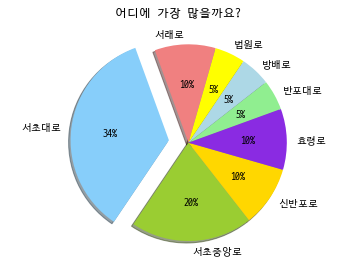

In [413]:
labels = count_road
size = count
explode = (0, 0, 0, 0, 0.2, 0, 0, 0)
colors=['lightgreen', 'lightblue', 'yellow', 'lightcoral', 'lightskyblue', 'yellowgreen', 'gold', 'blueviolet']
plt.title('어디에 가장 많을까요?'+'\n')
plt.pie(size, labels=labels, explode=explode, colors=colors, shadow=True, startangle=20, autopct = '%1i%%')
plt.axis('equal')
plt.show()

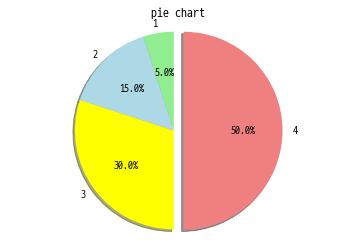

In [376]:
labels = [1,2,3,4]
size = [15, 30, 50, 5]
size1 = sorted(size)
explode = (0, 0, 0, 0.1)
colors = ['lightgreen', 'lightblue', 'yellow', 'lightcoral']
plt.title('pie chart')
plt.pie(size1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [414]:
plt.pie?